# student-perfirmance-ETL,EDA,Visualize


--- Dataset Shape ---
(6607, 20)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   objec

/tmp/ipykernel_17/456342890.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Parental_Involvement', y='Exam_Score', palette='Set2', ax=axes[1, 0])


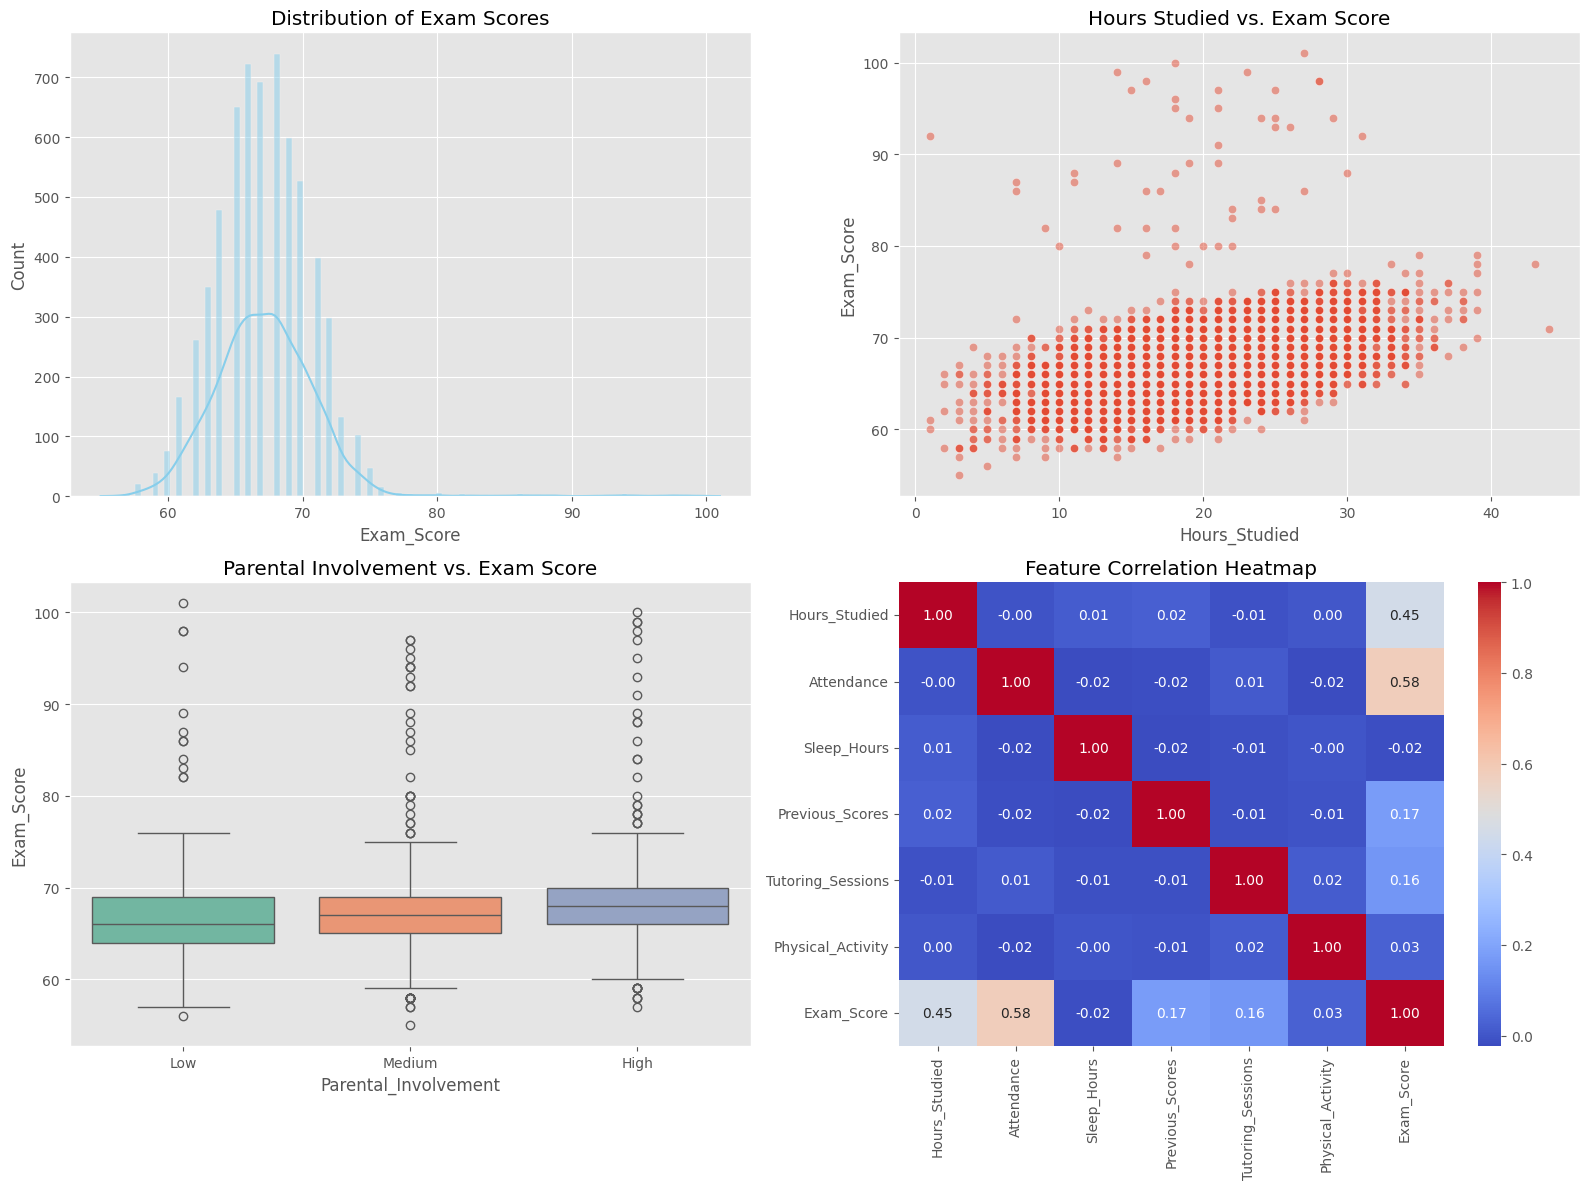

/tmp/ipykernel_17/456342890.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Gender', y='Exam_Score', palette='Pastel1')


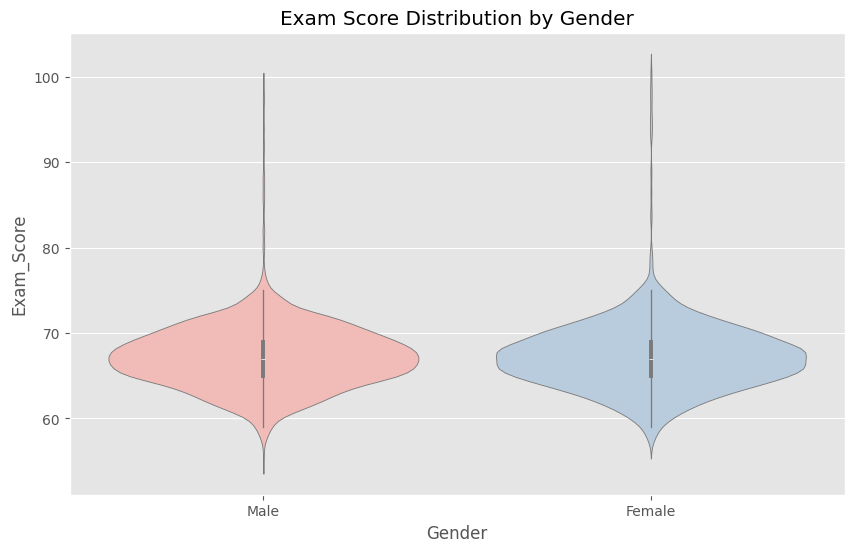


EDA and ETL Process Completed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load Dataset
DATA_DIR = "/kaggle/input/student-perfirmance/StudentPerformanceFactors.csv"
try:
    df = pd.read_csv(DATA_DIR)
except FileNotFoundError:
    # Fallback for local testing if path differs, but per instructions, using DATA_DIR
    import os
    if os.path.exists('StudentPerformanceFactors.csv'):
        df = pd.read_csv('StudentPerformanceFactors.csv')
    else:
        raise

# 2. Initial Data Inspection
print("--- Dataset Shape ---")
print(df.shape)
print("\n--- Dataset Info ---")
df.info()
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Sample Rows ---")
print(df.sample(5))

# 3. ETL - Data Cleaning and Preprocessing
# Handling missing values: simple drop for this analysis to ensure clean results
df_clean = df.copy()
initial_len = len(df_clean)
df_clean = df_clean.dropna()
print(f"\nRows removed due to nulls: {initial_len - len(df_clean)}")

# Strip whitespace from categorical columns if any
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].str.strip()

# Ensure types
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 4. EDA - Summary Statistics
print("\n--- Summary Statistics (Numeric) ---")
print(df_clean.describe())

print("\n--- Correlation Analysis (Numeric Only) ---")
correlation_matrix = df_clean[numeric_cols].corr()
print(correlation_matrix['Exam_Score'].sort_values(ascending=False))

# 5. Visualizations
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of Exam Scores
sns.histplot(df_clean['Exam_Score'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Exam Scores')

# Plot 2: Hours Studied vs Exam Score
sns.scatterplot(data=df_clean, x='Hours_Studied', y='Exam_Score', alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Hours Studied vs. Exam Score')

# Plot 3: Parental Involvement vs Exam Score
sns.boxplot(data=df_clean, x='Parental_Involvement', y='Exam_Score', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Parental Involvement vs. Exam Score')

# Plot 4: Correlation Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

# Extra: Gender-based Performance Comparison
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_clean, x='Gender', y='Exam_Score', palette='Pastel1')
plt.title('Exam Score Distribution by Gender')
plt.show()

print("\nEDA and ETL Process Completed.")
